In [2]:
import numpy as np
from sklearn.svm import NuSVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [4]:
Training = np.loadtxt("TrainingRidge.csv", skiprows=1, delimiter=",",dtype='float')
Validation = np.loadtxt("ValidationRidge.csv", skiprows=1, delimiter=",",dtype='float')
Xt = Training[:,0:2]
Xv = Validation[:,0:2]
Yt = Training[:,-1]
Yv = Validation[:,-1]


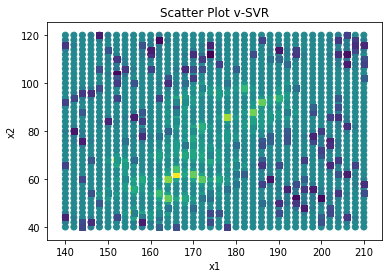

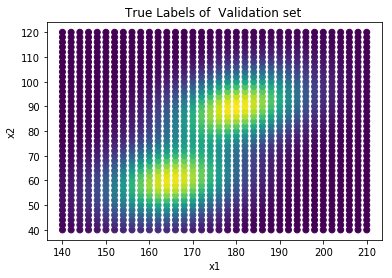

total mean square error
113343.926488


In [9]:
#svr = SVR(kernel="rbf", gamma=0.1)
#log = LinearRegression()

#svr.fit(X_train.reshape(-1,1),y_train)
#log.fit(X_train.reshape(-1,1), y_train)

#ν-SVR on the training set
svr_rbf = NuSVR()
y_rbf = svr_rbf.fit(Xt, Yt).predict(Xv)


#plots

#v-SVR
plt.figure()
plt.title("Scatter Plot v-SVR")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xv[:,0],Xv[:,1],c = y_rbf)
 
#adding training set to plot 
plt.scatter(Xt[:,0],Xt[:,1],c  = Yt,marker = "s")
plt.show()

#Validation Set 
plt.figure()
plt.title("True Labels of  Validation set ")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xv[:,0],Xv[:,1],c  = Yv)
plt.show()

#total mean square error
MSE = np.sum((y_rbf-Yv)**2)
print("total mean square error")
print(MSE)




In [4]:

###
#b
C_value = np.arange(-2, 12, 2)
C_value = np.power(2., C_value)
gamma_value = np.arange(-12, 2, 2)
gamma_value = np.power(2., gamma_value)


nsubset = 10

mean_training_matrix = np.zeros((len(C_value), len(gamma_value)))
crossvalidation_matrix = mean_training_matrix.copy()
#print np.shape(mean_training_matrix), len(C_value), len(gamma_value)

#training_results = np.zeros(nsubset)

one_slice = len(Training)/nsubset
i =0
n_subsets = 10
data = Training

       

   
        
def k_fold(data, n_subsets, c, g):
    training_results = np.zeros(n_subsets)
    test_results = training_results.copy()
    
    one_slice = len(data)/n_subsets
    rest = len(data) - one_slice
    for i in range(0, n_subsets):
        #Split data as training and test
        #print(one_slice)
        training = np.append(data[0:20*i, :], data[20*(i+1):, :], axis = 0)
        Yt = training[:,-1]
        test = data[20*i: 20*(i+1), :]
        #rbfclassif = SVC(C = c, kernel = 'rbf', gamma = g)
        #rbfclassif.fit(training[:, 0:2], training[:, 2])
        
        svr_rbf = NuSVR(kernel='rbf', C=c, gamma=g)
        y_rbf = svr_rbf.fit(training, Yt).predict(test)
        

        #y_pred_train = svr_rbf.fit(training, Yt).predict(training)
        #y_pred_test = svr_rbf.fit(training, Yt).predict(test)
        #training_results[i] = (np.sum(np.abs(y_pred_train - training[:, 2]) - 1) * -1)
        #test_results[i] = (np.sum(np.abs(y_pred_test - test[:, 2]) - 1) * -1)
        y_pred_train = svr_rbf.fit(training, Yt).predict(Xt)
        y_pred_test = svr_rbf.fit(training, Yt).predict(Xv)


        training_results = (np.sum(np.abs(y_pred_train - Training[:,-1]) - 1) * -1)
        test_results = (np.sum(np.abs(y_pred_test - Validation[:,-1]) - 1) * -1)
        
    return np.average(training_results)/rest, np.average(test_results)/one_slice

for i in range(0, len(C_value)):
    for j in range(0, len(gamma_value)):
        mean_tr, cv = k_fold(Xt, nsubset, C_value[i], gamma_value[j]) #return mean training performance and crossvalidation performance
        mean_training_matrix[i, j] = mean_tr
        crossvalidation_matrix[i, j] = cv


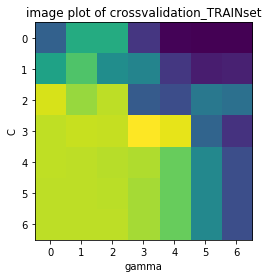

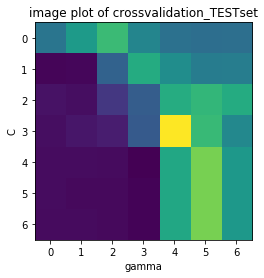

In [11]:
plt.figure()
plt.title("image plot of crossvalidation_TRAINset")
plt.imshow(mean_training_matrix)
plt.xlabel("gamma")
plt.ylabel("C")

plt.figure()
plt.title("image plot of crossvalidation_TESTset")
plt.imshow(crossvalidation_matrix)
plt.xlabel("gamma")
plt.ylabel("C")

plt.show()

#brighter area is signalling a lower MSE

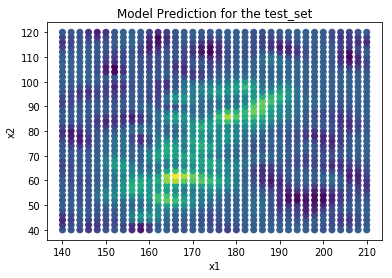

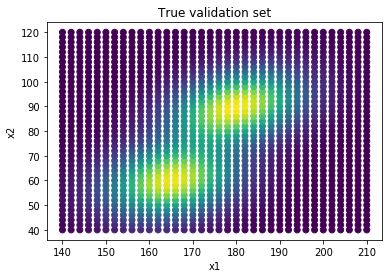

total mean square error
37723.1401613


In [14]:
#c

#from previous task, we could see, that approximately on C[3] = 16 and gamma[4] = 0.0625 we got the best results
svr_final = NuSVR(kernel='rbf', C=16, gamma=0.0625)
y_rbf = svr_rbf.fit(Xt, Yt).predict(Xv)



plt.figure()
plt.title("Model Prediction for the test_set")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xv[:,0],Xv[:,1],c = y_rbf)

plt.figure()
plt.title("True validation set")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(Xv[:,0],Xv[:,1],c  = Yv)

plt.show()

#total mean square error
MSE = np.sum((y_rbf-Yv)**2)
print("total mean square error")
print(MSE)

